In [38]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [39]:
uac = pd.read_csv("Unemployment and Crime.csv")

In [40]:
uac.head()

,Month,Year,Murder,Rape,Robbery,Assault,Burglary,Larceny,Vehicle_Theft,TotalCrime,Unemploy_Georgia,Nat_Unemploy
0,Jan,2013,56,139,1152,1736,7269,17968,2418,30738,0.091,0.080
1,Feb,2013,32,127,856,1328,5345,14844,1872,24404,0.086,0.077
2,Mar,2013,38,144,863,1685,5630,16621,2129,27110,0.082,0.075
3,Apr,2013,42,160,919,1709,6248,17401,2035,28514,0.079,0.076
4,May,2013,41,193,1128,1867,7103,19277,2105,31714,0.082,0.075


In [41]:
uac1 = uac[['Murder', 'Unemploy_Georgia']]

In [6]:
uac1.head()

,Murder,Unemploy_Georgia
0,56,0.091
1,32,0.086
2,38,0.082
3,42,0.079
4,41,0.082


In [42]:
uac1.dropna(inplace = True)

<ipython-input-42-1494953dd90a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1.dropna(inplace = True)


In [43]:
uac1.head()

,Murder,Unemploy_Georgia
0,56,0.091
1,32,0.086
2,38,0.082
3,42,0.079
4,41,0.082


## Test Assumptions

/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Murder', ylabel='Density'>

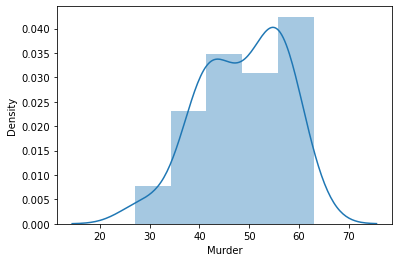

In [44]:
sns.distplot(uac1['Murder'])

In [45]:
uac1['MurderSQRT'] = np.sqrt(uac1['Murder'])

<ipython-input-45-0677fa9641fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1['MurderSQRT'] = np.sqrt(uac1['Murder'])


In [46]:
uac1.head()

,Murder,Unemploy_Georgia,MurderSQRT
0,56,0.091,7.483315
1,32,0.086,5.656854
2,38,0.082,6.164414
3,42,0.079,6.480741
4,41,0.082,6.403124


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MurderSQRT', ylabel='Density'>

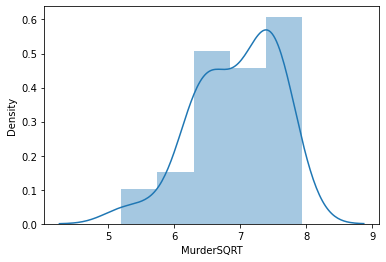

In [47]:
sns.distplot(uac1['MurderSQRT'])

In [48]:
scipy.stats.bartlett(uac1['MurderSQRT'], uac1['Unemploy_Georgia'])

BartlettResult(statistic=235.54573904868204, pvalue=3.6810394724107333e-53)

In [49]:
scipy.stats.fligner(uac1['MurderSQRT'], uac1['Unemploy_Georgia'])

FlignerResult(statistic=45.544348808662384, pvalue=1.4922159091260272e-11)

## Sample Size

In [50]:
uac1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Murder            36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   MurderSQRT        36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Independence

## Analysis

In [51]:
uac1.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [52]:
postHoc = MultiComparison(uac1['MurderSQRT'], uac1['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 0.054  0.057  -0.1844    0.9 -1.7548   1.386  False
 0.054   0.06  -0.8147 0.8464 -2.5349  0.9056  False
 0.054  0.061  -0.8147    0.9 -2.9216  1.2922  False
 0.054  0.062  -0.8905    0.9 -2.9974  1.2164  False
 0.054  0.063  -0.5333    0.9 -2.2536  1.1869  False
 0.054  0.064  -0.1401    0.9 -1.8603  1.5802  False
 0.054  0.066  -0.5838    0.9  -2.304  1.1365  False
 0.054  0.067  -0.3065    0.9 -2.4134  1.8003  False
 0.054  0.069   0.3623    0.9 -1.7446  2.4692  False
 0.054  0.072   0.2332    0.9 -1.8737  2.3401  False
 0.054  0.073  -0.0779    0.9 -1.6483  1.4924  False
 0.054  0.074  -1.2835 0.5505 -3.3904  0.8233  False
 0.054  0.075  -2.2518 0.0306 -4.3586 -0.1449   True
 0.054  0.076   0.0686    0.9 -1.6516  1.7889  False
 0.054  0.079  -1.0453 0.5539 -2.7655  0.6749  False
 0.054   0.08  -0.5197    0.9   -2.24  1.2005 

In [53]:
uac1.groupby('Unemploy_Georgia').mean()

,Murder,MurderSQRT
Unemploy_Georgia,,
0.054,55.500000,7.447941
0.057,53.000000,7.263551
0.060,44.000000,6.633250
0.061,44.000000,6.633250
0.062,43.000000,6.557439
0.063,48.000000,6.914605
0.064,53.500000,7.307887
0.066,47.500000,6.864156
0.067,51.000000,7.141428
